#  Simple 3-layer neural network with mini-batch GD optimization for merged loss visualization
+ Mini-batch GD is used mostly in deep learning in achieving good performance with respect to
+ computational efficiency and stability of the algorithm. 
+ Here, train and test losses are shown together for better comparative visualization.
+ The average of loss and accuracy for each mini-batch is displayed.
+ Copyright © 2019 jtpark2020 

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

eta = 0.05 # learning rate
epoch = 10000

In [3]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_deriv(x):
    return x * (1.0 - x)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(z):
    return (z > 0).astype(float)

def softmax(x):
    # softmax   
    e = np.exp(x - np.max(x))    # x-m is used to avoid overflow of exponent function
    return e / np.sum(e, axis=0) # add in column

class neuralnetwork:
    # neural network model
    
    def __init__(self, x, w1, w2, w3, y):
        self.inputs   = x.T
        self.target  = y.T        # target
        self.weights1 = w1        # weights at layer 1
        self.weights2 = w2        # weights at layer 2
        self.weights3 = w3        # weights at output layer
        self.b1 = np.zeros((10,1)) # bias at layer 1 
        self.b2 = np.zeros((100,1)) # bias at layer 2 
        self.b3 = np.zeros((3,1)) # bias at output layer   
        self.layer1  = np.zeros((10, self.inputs.shape[1])) # output at layer 1
        self.layer2  = np.zeros((100, self.inputs.shape[1])) # output at layer 2
        self.output   = np.zeros(self.target.shape) # output of output layer
    

    def forwardprop(self):
        # forward processing of inputs and weights using sigmoid activation function
        self.layer1 = relu(np.dot(self.weights1, self.inputs) + self.b1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.layer2) + self.b3)

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the loss function with respect to weights
        delta3 = (self.output - self.target) 
        delta2 = np.dot(self.weights3.T, delta3) * sigmoid_deriv(self.layer2)
        delta1 = np.dot(self.weights2.T, delta2) * relu_deriv(self.layer1)
        dw3 = np.dot(delta3, self.layer2.T)
        dw2 = np.dot(delta2, self.layer1.T)
        dw1 = np.dot(delta1, self.inputs.T)

        # update the weights with the derivative of the loss function   
        self.weights3 -= eta * dw3 / batch_size
        self.weights2 -= eta * dw2 / batch_size
        self.weights1 -= eta * dw1 / batch_size

        # update biases with the derivative of the loss function
        self.b3 -= eta * np.sum(delta3, axis = 1, keepdims=True) / batch_size # add in row axis, keeping column dimension
        self.b2 -= eta * np.sum(delta2, axis = 1, keepdims=True) / batch_size # add in row axis, keeping column dimension
        self.b1 -= eta * np.sum(delta1, axis = 1, keepdims=True) / batch_size # add in row axis, keeping column dimension

    def predict(self, x):
        # predict the output for a given input x
        self.layer1 = relu(np.dot(self.weights1, x) + self.b1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.layer2) + self.b3)
        return (self.output)
        
     # calculate error
    def calculate_error(self):
        error = np.sum(-self.target * np.log(self.output)) # cross entropy loss function
        return error

    def calculate_accuracy(self):
        # calculate accuracy
        target_label = np.argmax(self.target.T, axis = 1)
        output_label = np.argmax(self.output.T, axis = 1)
        accuracy = 100 * np.sum(target_label == output_label) / float(self.target.T.shape[0])
        return accuracy

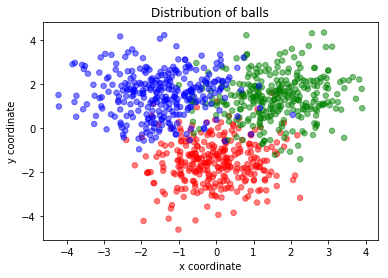

In [4]:
if __name__ == "__main__":

    # get training data set
    samples = 300
    attributes = 2
    classes = 3

    np.random.seed(45)
    data1_set = np.random.randn(samples, attributes) + np.array([0.0, -1.5])  # red ball
    data2_set = np.random.randn(samples, attributes) + np.array([1.5, 1.5])  # green ball
    data3_set = np.random.randn(samples, attributes) + np.array([-1.5, 1.5])  # blue ball
    
    feature_set = np.vstack([data1_set, data2_set, data3_set])   
    labels = np.array([0]*samples + [1]*samples + [2]*samples)

    # Initializing colors and building a colormap
    cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])

    # display data training data set
    # plt.figure(figsize=(10,7))
    plt.title("Distribution of balls")
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap =cmap, s= 30, alpha=0.5)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

    one_hot_labels = np.zeros((samples*classes, classes))

    for i in range(samples*classes):  
        one_hot_labels[i, labels[i]] = 1

    # concatenate feature data and labels, and shuffle it
    concat_data = np.concatenate((feature_set, one_hot_labels), axis = 1)
    np.random.shuffle(concat_data) # shuffle the concatenated data 

    # extract training data and test data from concatenated data
    train_data = concat_data[0:math.floor(3 * samples * 0.7), :]  # 70 % samples are selected for training data
    test_data = concat_data[math.floor(3 * samples * 0.3):3 * samples, :]  # 30 % samples are selected for test data
    test_inputdata = test_data[:, 0:2]
    test_targetvalue = test_data[:, 2:5]

    batch_size = 50 # size of mini-batch data
    
    # training with mini-batch gradient descent optimization
    w1 = np.random.rand(10, attributes)      # ininialize weights at layer 1 where number of nueron nodes is 10
    w2 = np.random.rand(100, 10)    # ininialize weights at layer 2 where number of nueron nodes is 100
    w3 = np.random.rand(3, 100)     # ininialize weights at layer 3 where number of nueron nodes is 10

    training_loss = []
    training_accuracy = []
    test_loss = []

In [5]:
    # training
    
    for i in range(epoch):

        np.random.shuffle(train_data) # randomize the training data
        train_inputdata = train_data[:, 0:2] # extract training input data
        train_targetvalue = train_data[:, 2:5] # extract training target labels
        num_batch = int(math.ceil(train_data.shape[0]/batch_size))  # trainining data divided by mini-batch size
        loss_sum = 0
        accu_sum = 0

        for j in range(num_batch): 
            x = train_inputdata[batch_size * j: batch_size * (j+1)]     # define training input for mini-batch data 
            y = train_targetvalue[batch_size * j: batch_size * (j+1)]   # define training target for mini-batch data 
            nn = neuralnetwork(x, w1, w2, w3, y)
            nn.forwardprop()
            nn.backprop()
            w1 = nn.weights1
            w2 = nn.weights2
            w3 = nn.weights3
            loss_sum += nn.calculate_error()
            accu_sum += nn.calculate_accuracy()

        if (i % 10) == 0:     

            # averages of loss and accuracy during training are calculated 
            training_loss.append(loss_sum / num_batch)
            training_accuracy.append(accu_sum / num_batch)
 
            # run neural net for test with weights w1, w2 and w3 which are obtained up to the current epoch of training steps
            test_nn = neuralnetwork(test_inputdata, w1, w2, w3, test_targetvalue) 
            test_nn.forwardprop()
            test_loss.append(test_nn.calculate_error())  # store test loss
            
            '''
            # calculate the trainging loss and accuracy  
            training_loss.append(nn.calculate_error())
            training_accuracy.append(nn.calculate_accuracy())
            '''
    

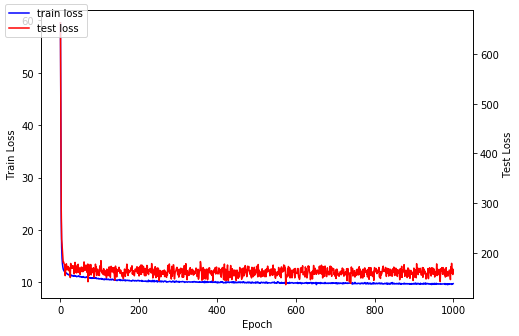

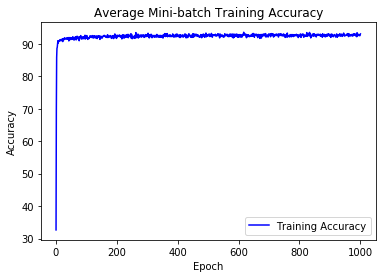

In [6]:
 # visualize the training loss and test loss
    fig = plt.figure()
    epoch_count = range(1, len(training_loss) + 1)
    y1 = fig.add_axes([0,0,1,1])
    y1.plot(epoch_count, training_loss, 'b-')
    y1.set_xlabel('Epoch')
    y1.set_ylabel('Train Loss')  
    y2 = y1.twinx()  
    y2.set_ylabel('Test Loss')  
    y2.plot(epoch_count, test_loss, 'r-')
    fig.legend(labels = ('train loss','test loss'),loc='upper left')
    plt.show()

    # visualize the training accuracy of the model
    plt.plot(epoch_count, training_accuracy, 'b-')
    plt.title('Average Mini-batch Training Accuracy')
    plt.legend(['Training Accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

In [7]:
 # testing the output for a given test input data and evaluate the test accuracy
    test_output = nn.predict(test_inputdata.T)
    test_target_label = np.argmax(test_output.T, axis = 1)
    test_output_label = np.argmax(test_targetvalue, axis = 1)
    test_accuracy = 100 * np.sum(test_target_label == test_output_label) / float(test_targetvalue.shape[0])
    print("Test accuracy:", test_accuracy)
    
    # predicting the output for a given input data
    # For a given input data [1, -1], it is predicated as red ball since the output is [0, 1, 0], i.e. the red ball.
    x_prediction = np.array([[1.0, -1.0]])
    predicted_output = nn.predict(x_prediction.T)
    print("Predicted data based on trained weights: ")
    print("Input: ", x_prediction)
    print("Output: ", predicted_output.T)
    if np.argmax(predicted_output.T) == 0:
        print("it is predicted to be red ball.")
    elif np.argmax(predicted_output.T) == 1:
        print("it is predicted to be green ball.")
    elif np.argmax(predicted_output.T) == 2:
        print("it is predicted to be blue ball.") 

Test accuracy: 91.11111111111111
Predicted data based on trained weights: 
Input:  [[ 1. -1.]]
Output:  [[0.95706131 0.03793226 0.00500642]]
it is predicted to be red ball.
